<a href="https://colab.research.google.com/github/faisalcep/icons/blob/master/Box_Cox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# load and summarize the sonar dataset
from pandas import read_csv
from matplotlib import pyplot

In [4]:
from google.colab import files
uploaded = files.upload()

Saving sonar.csv to sonar.csv


In [5]:
# load dataset
dataset = read_csv('sonar.csv', header=None)
data = dataset.values

In [6]:
# summarize the shape of the dataset
print(dataset.shape)

(208, 61)


In [7]:
dataset.info

<bound method DataFrame.info of          0       1       2       3       4   ...      56      57      58      59  60
0    0.0200  0.0371  0.0428  0.0207  0.0954  ...  0.0180  0.0084  0.0090  0.0032   R
1    0.0453  0.0523  0.0843  0.0689  0.1183  ...  0.0140  0.0049  0.0052  0.0044   R
2    0.0262  0.0582  0.1099  0.1083  0.0974  ...  0.0316  0.0164  0.0095  0.0078   R
3    0.0100  0.0171  0.0623  0.0205  0.0205  ...  0.0050  0.0044  0.0040  0.0117   R
4    0.0762  0.0666  0.0481  0.0394  0.0590  ...  0.0072  0.0048  0.0107  0.0094   R
..      ...     ...     ...     ...     ...  ...     ...     ...     ...     ...  ..
203  0.0187  0.0346  0.0168  0.0177  0.0393  ...  0.0065  0.0115  0.0193  0.0157   M
204  0.0323  0.0101  0.0298  0.0564  0.0760  ...  0.0034  0.0032  0.0062  0.0067   M
205  0.0522  0.0437  0.0180  0.0292  0.0351  ...  0.0140  0.0138  0.0077  0.0031   M
206  0.0303  0.0353  0.0490  0.0608  0.0167  ...  0.0034  0.0079  0.0036  0.0048   M
207  0.0260  0.0363  0.0136  0.02

In [8]:
# summarize each variable
print(dataset.describe())

               0           1           2   ...          57          58          59
count  208.000000  208.000000  208.000000  ...  208.000000  208.000000  208.000000
mean     0.029164    0.038437    0.043832  ...    0.007949    0.007941    0.006507
std      0.022991    0.032960    0.038428  ...    0.006470    0.006181    0.005031
min      0.001500    0.000600    0.001500  ...    0.000300    0.000100    0.000600
25%      0.013350    0.016450    0.018950  ...    0.003600    0.003675    0.003100
50%      0.022800    0.030800    0.034300  ...    0.005800    0.006400    0.005300
75%      0.035550    0.047950    0.057950  ...    0.010350    0.010325    0.008525
max      0.137100    0.233900    0.305900  ...    0.044000    0.036400    0.043900

[8 rows x 60 columns]


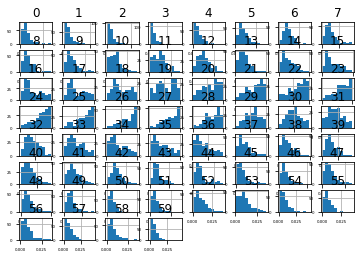

In [9]:
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)


In [10]:
# show the plot
[x.title.set_size(4) for x in fig.ravel()]
pyplot.show()

In [11]:
# evaluate knn on
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

from pandas import read_csv
from pandas import DataFrame
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

In [12]:
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]

In [13]:
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))

In [14]:
# Evaluate Raw Data Set
# define and configure the model
model = KNeighborsClassifier()


In [15]:
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [16]:
# report model performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.797 (0.073)


In [17]:
# Evaluate using Box-Cox
# retrieve just the numeric input values
data = dataset.values[:, :-1]


In [18]:
# perform a box-cox transform of the dataset
pt = PowerTransformer(method='box-cox')

In [19]:
# perform a box-cox transform of the dataset
scaler = MinMaxScaler(feature_range=(1, 2))
power = PowerTransformer(method='box-cox')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('s', scaler),('p', power)])
data = pipeline.fit_transform(data)

In [20]:
# convert the array back to a dataframe
dataset = DataFrame(data)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

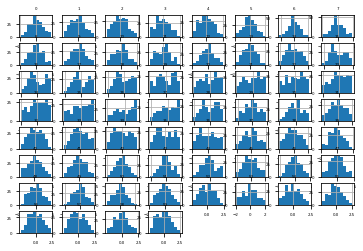

In [21]:
# histograms of the variables
fig = dataset.hist(xlabelsize=4, ylabelsize=4)
[x.title.set_size(4) for x in fig.ravel()]


In [22]:
# show the plot
pyplot.show()

In [23]:
scaler = MinMaxScaler(feature_range=(1, 2))
power = PowerTransformer(method='box-cox')
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('s', scaler),('p', power), ('m', model)])

In [24]:
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [25]:
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.811 (0.085)
